In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sqlalchemy import create_engine

In [57]:
# Read csv file
subcat = "./Project_Data_Dummified.csv"
subcat_df = pd.read_csv(subcat)
subcat_df.fillna(0)

,% of Budget (ID),ACCOUNT_TYPE,ACTIVE_STOREFRONTS,CAMPAIGN_ID,Component 1,Component 2,Component 3,Taps,Impressions,Content Provider Id,...,Target TTR,Minimum Impressions,Minimum Impressions ST,Last Week Date Range,Min Budget,Cost,WEEK_ID,WEEK_START_DAY,Week,Year
0,0%,DEVELOPER,[JP],189809310,0,0.0,0.0,1,3,1175743,...,33.33%,False,True,False,"$10,000",$4,20190224,2/24/19 0:00,2/24/19,2019
1,0%,DEVELOPER,[DE],189579932,0,0.0,0.0,4,10,1175743,...,40.00%,False,True,False,"$10,000",$7,20190224,2/24/19 0:00,2/24/19,2019
2,0%,DEVELOPER,[US],189765529,0,0.0,0.0,8,70,1175743,...,11.43%,False,True,False,"$10,000",$27,20190224,2/24/19 0:00,2/24/19,2019
3,0%,DEVELOPER,[CH],189905135,0,0.0,0.0,0,2,1175743,...,0.00%,False,True,False,"$10,000",$0,20190224,2/24/19 0:00,2/24/19,2019
4,0%,DEVELOPER,[KR],189538613,0,0.0,0.0,2,6,1175743,...,33.33%,False,True,False,"$10,000",$3,20190224,2/24/19 0:00,2/24/19,2019
5,1%,DEVELOPER,[US],189765529,0,0.0,0.0,17,100,1175743,...,17.00%,False,True,False,"$10,000",$51,20190303,3/3/19 0:00,3/3/19,2019
6,0%,DEVELOPER,[DE],189579932,0,0.0,0.0,4,9,1175743,...,44.44%,False,True,False,"$10,000",$5,20190303,3/3/19 0:00,3/3/19,2019
7,0%,DEVELOPER,[KR],189538613,0,0.0,0.0,2,7,1175743,...,28.57%,False,True,False,"$10,000",$4,20190303,3/3/19 0:00,3/3/19,2019
8,0%,DEVELOPER,[JP],189809310,0,0.0,0.0,0,2,1175743,...,0.00%,False,True,False,"$10,000",$0,20190303,3/3/19 0:00,3/3/19,2019
9,0%,DEVELOPER,[US],189765529,0,0.0,0.0,8,81,1175743,...,9.88%,False,True,True,"$10,000",$24,20190303,3/3/19 0:00,3/3/19,2019


In [3]:
# Create new dataframe with select columns
spend_subcat_df = subcat_df[["The_Date", "SEARCH_SUB_CATEGORY", "CURRENCY_COST", "Storefront"]].copy()
spend_subcat_df.rename(columns={"The_Date": 'date', 
                                "SEARCH_SUB_CATEGORY": 'subcat',  
                                "CURRENCY_COST": 'spend', 
                                "Storefront": 'country'}, inplace=True)
spend_subcat_df.head()

,date,subcat,spend,country
0,3/2/19,A,4.33,JP
1,3/2/19,A,7.02,DE
2,3/2/19,A,26.79,US
3,3/2/19,A,0.00,CH
4,3/2/19,A,3.40,KR


In [4]:
# Create another mini dataframe with different columns
agg_spend_subcat_df = spend_subcat_df.groupby(['subcat', 'country', 'date'])[['spend']].sum()
agg_spend_subcat_df["id"] = range(1, len(agg_spend_subcat_df) + 1)
agg_spend_subcat_df['spend']=agg_spend_subcat_df['spend'].apply(lambda x:round(x,2))
agg_spend_subcat_df.head()

spend  id
subcat country date              
A      AU      3/10/19   2.32   1
               3/11/19   1.40   2
               3/12/19   1.58   3
               3/13/19   6.98   4
               3/14/19  27.13   5

In [5]:
# Export to csv
agg_spend_subcat_df.to_csv("./subcat_spend.csv", index=True, header=True)

In [6]:
# Import and reorder
subcat_v2 = "./subcat_spend.csv"
subcat_v2_df = pd.read_csv(subcat_v2)
subcat_v2_df.head()

,subcat,country,date,spend,id
0,A,AU,3/10/19,2.32,1
1,A,AU,3/11/19,1.40,2
2,A,AU,3/12/19,1.58,3
3,A,AU,3/13/19,6.98,4
4,A,AU,3/14/19,27.13,5


In [7]:
# reoder dataframe
reordered_subcat_df = subcat_v2_df.set_index("id")
reordered_subcat_df.head()

,subcat,country,date,spend
id,,,,
1,A,AU,3/10/19,2.32
2,A,AU,3/11/19,1.40
3,A,AU,3/12/19,1.58
4,A,AU,3/13/19,6.98
5,A,AU,3/14/19,27.13


In [9]:
# Import dependencies to connect to db
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [10]:
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

In [11]:
from sqlalchemy import Column, Integer, String, Float, Date

In [12]:
import psycopg2 as pg

/Users/dorispira/anaconda3/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [13]:
# Connect to postgres
engine = create_engine('<inser user name>:<insert password>@127.0.0.1/subcat_db')

In [14]:
# Load data into postgres
reordered_subcat_df.to_sql('subcategory', con=engine, if_exists='replace', index=False)

In [47]:
# Check to see table name
inspector = inspect(engine)
inspector.get_table_names()

['subcategory']

In [48]:
# Query to make sure data was loaded into table correctly
subcategories = pd.read_sql('SELECT * FROM subcategory', con=engine)
subcategories.head()

,subcat,country,date,spend
0,A,AU,2019-03-10,2.32
1,A,AU,2019-03-11,1.40
2,A,AU,2019-03-12,1.58
3,A,AU,2019-03-13,6.98
4,A,AU,2019-03-14,27.13


In [49]:
# Check columns to see data types
columns = inspector.get_columns('subcategory')
for c in columns:
    print(c['name'], c["type"])

subcat TEXT
country TEXT
date DATE
spend DOUBLE PRECISION


In [50]:
session = Session(engine)

In [51]:
# Query to pull data needed to create graph
data = engine.execute('SELECT date, subcat, spend FROM subcategory').fetchall() #.strftime("%m-%d-%y")
data

[(datetime.date(2019, 3, 10), 'A', 2.32),
 (datetime.date(2019, 3, 11), 'A', 1.4),
 (datetime.date(2019, 3, 12), 'A', 1.58),
 (datetime.date(2019, 3, 13), 'A', 6.98),
 (datetime.date(2019, 3, 14), 'A', 27.13),
 (datetime.date(2019, 3, 15), 'A', 37.48),
 (datetime.date(2019, 3, 16), 'A', 59.89),
 (datetime.date(2019, 3, 17), 'A', 48.25),
 (datetime.date(2019, 3, 2), 'A', 4.61),
 (datetime.date(2019, 3, 3), 'A', 2.84),
 (datetime.date(2019, 3, 4), 'A', 1.64),
 (datetime.date(2019, 3, 5), 'A', 1.84),
 (datetime.date(2019, 3, 6), 'A', 2.23),
 (datetime.date(2019, 3, 7), 'A', 3.15),
 (datetime.date(2019, 3, 8), 'A', 2.45),
 (datetime.date(2019, 3, 9), 'A', 2.97),
 (datetime.date(2019, 3, 10), 'A', 10.88),
 (datetime.date(2019, 3, 11), 'A', 9.08),
 (datetime.date(2019, 3, 12), 'A', 9.72),
 (datetime.date(2019, 3, 13), 'A', 36.09),
 (datetime.date(2019, 3, 14), 'A', 45.04),
 (datetime.date(2019, 3, 15), 'A', 41.84),
 (datetime.date(2019, 3, 16), 'A', 54.0),
 (datetime.date(2019, 3, 17), 'A', 

In [52]:
# Convert to a df
data_df = pd.DataFrame(data, columns=["date", "subcat", "spend"])
data_df.head()

,date,subcat,spend
0,2019-03-10,A,2.32
1,2019-03-11,A,1.40
2,2019-03-12,A,1.58
3,2019-03-13,A,6.98
4,2019-03-14,A,27.13


In [53]:
# Group data by date then subcategory, to aggregate spend
data_grouped_v2 = data_df.groupby(["date", "subcat"]).sum().reset_index()
data_grouped_v2.head()

,date,subcat,spend
0,2019-03-02,A,2466.35
1,2019-03-02,Adv,1263.80
2,2019-03-02,Ar,278.22
3,2019-03-02,Brd,2421.16
4,2019-03-02,C,8797.86


In [54]:
# Pivot table the df and set index to date, so we can see spend by date for each subcategory
data_pivot_df = data_grouped_v2.pivot(index='date', columns='subcat', values='spend')
data_pivot_df

subcat,A,Adv,Ar,Brd,C,Cd,Ed,Otr,Pz,Rc,Rp,Sml,Sp,Str,Trv
date,,,,,,,,,,,,,,,
2019-03-02,2466.35,1263.80,278.22,2421.16,8797.86,1813.17,NaN,326.77,10.27,118.90,888.97,1786.57,1080.61,NaN,1924.38
2019-03-03,1945.08,799.54,212.37,2568.77,8782.79,1755.84,0.0,51.66,15.05,141.18,1641.76,872.81,222.53,NaN,1210.77
2019-03-04,1284.37,654.70,178.81,1978.36,8405.09,1307.05,NaN,55.17,8.11,102.61,884.93,618.71,229.27,NaN,1047.30
2019-03-05,1033.44,772.99,189.18,1838.97,6820.83,1474.32,NaN,49.38,6.64,77.56,695.72,571.21,232.32,NaN,974.31
2019-03-06,1046.51,789.91,218.55,1569.52,5016.55,895.72,NaN,65.18,3.34,75.36,687.95,520.51,240.55,NaN,1019.27
2019-03-07,1126.28,737.84,228.02,1730.53,7151.92,570.35,0.0,123.59,2.08,75.49,716.59,553.13,222.56,NaN,1017.71
2019-03-08,1239.43,848.03,190.80,2020.56,4790.49,661.20,NaN,179.30,7.29,70.55,829.57,504.51,221.64,52.52,1034.64
2019-03-09,1731.85,972.40,215.33,2681.17,7552.11,790.19,NaN,262.77,26.21,103.21,1505.99,762.69,225.90,260.83,1124.93
2019-03-10,1993.74,968.31,236.86,2536.69,7454.48,693.93,NaN,266.54,11.99,105.17,1614.75,846.17,225.60,215.37,1170.98


In [58]:
# Export pivoted df to csv
data_pivot_df.to_csv("./data_pivot.csv", index=True, header=True)

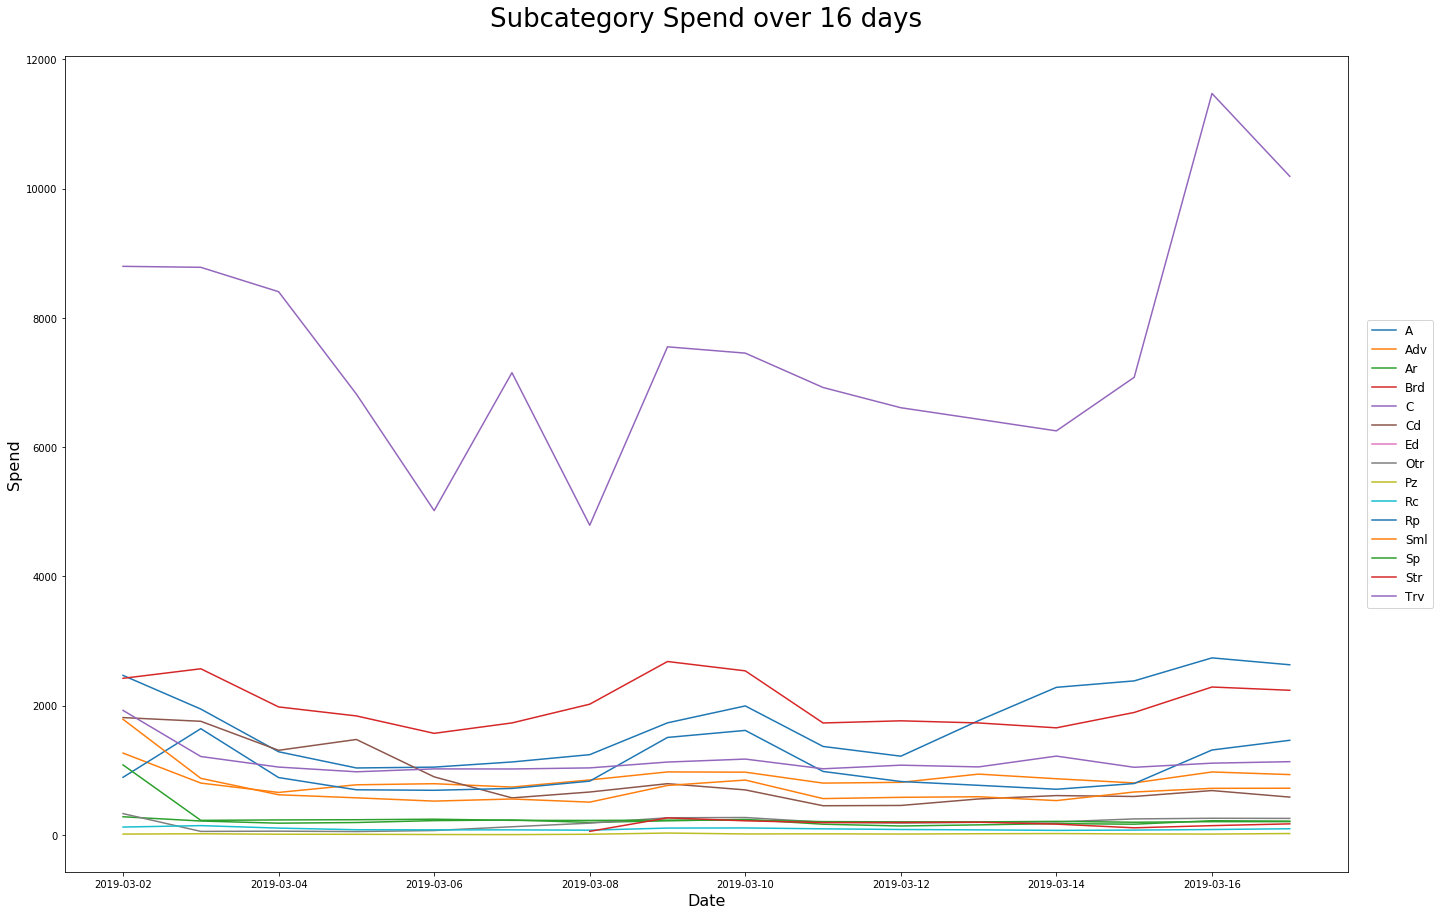

In [59]:
# Import figure from Matplotlib to plot line graph
from matplotlib.pyplot import figure

# Plot line graph and save as png
data_pivot_df.plot.line(figsize=(23,15))
plt.title("Subcategory Spend over 16 days", fontsize=26, pad=30)
plt.ylabel("Spend", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=12)
plt.savefig('./subcategory_spend.png')